### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 

In [2]:
data = pd.read_csv('marvel.csv', sep = ';' )
data = data.fillna(0)

In [3]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,0,Living Characters,4043,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,0,Living Characters,3360,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,3061,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,2961,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,0,Living Characters,2258,Nov-50,1950.0


In [4]:
data.dtypes

page_id               int64
name                 object
urlslug              object
ID                   object
ALIGN                object
EYE                  object
HAIR                 object
SEX                  object
GSM                  object
ALIVE                object
APPEARANCES           int64
FIRST APPEARANCE     object
Year                float64
dtype: object

In [5]:
data.isnull().sum()
# проверим есть ли пропущенные значения

page_id             0
name                0
urlslug             0
ID                  0
ALIGN               0
EYE                 0
HAIR                0
SEX                 0
GSM                 0
ALIVE               0
APPEARANCES         0
FIRST APPEARANCE    0
Year                0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   page_id           309 non-null    int64  
 1   name              309 non-null    object 
 2   urlslug           309 non-null    object 
 3   ID                309 non-null    object 
 4   ALIGN             309 non-null    object 
 5   EYE               309 non-null    object 
 6   HAIR              309 non-null    object 
 7   SEX               309 non-null    object 
 8   GSM               309 non-null    object 
 9   ALIVE             309 non-null    object 
 10  APPEARANCES       309 non-null    int64  
 11  FIRST APPEARANCE  309 non-null    object 
 12  Year              309 non-null    float64
dtypes: float64(1), int64(2), object(10)
memory usage: 31.5+ KB


In [7]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,0,Living Characters,4043,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,0,Living Characters,3360,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,3061,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,0,Living Characters,2961,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,0,Living Characters,2258,Nov-50,1950.0


<AxesSubplot:>

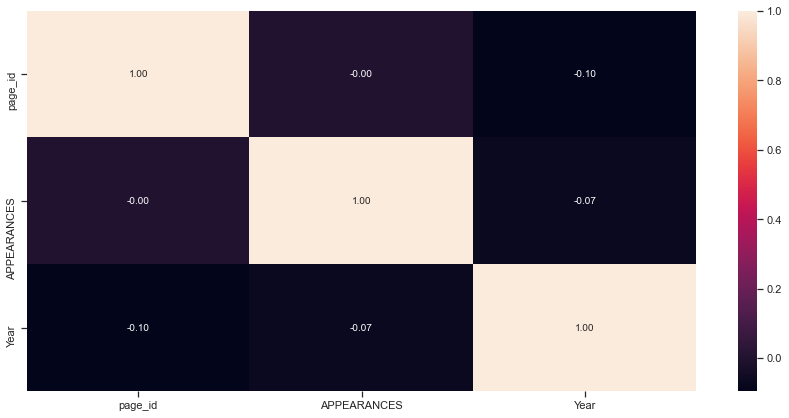

In [8]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [9]:
X = data.drop(['name','urlslug','ID','ALIGN','EYE','HAIR','SEX','GSM', 'ALIVE','FIRST APPEARANCE','APPEARANCES'], axis = 1)
Y = data.APPEARANCES
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    page_id    Year
0     1678  1962.0
1     7139  1941.0
2    64786  1974.0
3     1868  1963.0
4     2460  1950.0 

Выходные данные:

 0    4043
1    3360
2    3061
3    2961
4    2258
Name: APPEARANCES, dtype: int64


In [10]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      page_id    Year
144     1808  1962.0
256     2624  1970.0
252     1756  1978.0
116     1161  1978.0
161     2034  1963.0 

Входные параметры тестовой выборки:

      page_id    Year
63      1285  1976.0
231     2065  1969.0
167     2309  1983.0
159     1029  1967.0
189     8844  1964.0 

Выходные параметры обучающей выборки:

 144    270
256    158
252    161
116    324
161    250
Name: APPEARANCES, dtype: int64 

Выходные параметры тестовой выборки:

 63     528
231    175
167    245
159    252
189    224
Name: APPEARANCES, dtype: int64


In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [13]:
pred_y = forest_1.predict(X_test)

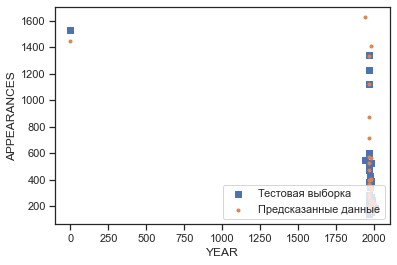

In [14]:
plt.scatter(X_test.Year, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.Year, pred_y, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('YEAR')
plt.ylabel ('APPEARANCES')
plt.show()

In [15]:
from sklearn.svm import SVC , LinearSVC

In [16]:
svc = SVC(kernel='linear')
svc.fit(X_train, Y_train)
Y_predict = svc.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_predict))

In [ ]:
plt.scatter(X_test.Year, Y_test,    marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.Year, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('YEAR')
plt.ylabel('APPEARANCES')
plt.show()